<a href="https://colab.research.google.com/github/tec03/continuous_learning/blob/main/CIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Confidence Intervals (CIs)


1. **What is a Confidence Interval?**

   * A range of plausible values for a population proportion
   * Based on repeated sampling logic

2. **Two Ways to Estimate Standard Error (SE)**

   **Formula-Based SE (Theoretical)**

   * Uses the binomial formula: $ SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} $

   * Assumes a normal approximation

   **Bootstrap-Based SE (Empirical)**

   * Uses the standard deviation of many resampled proportions
   * More flexible, especially with skewed or small samples

3. **Building CIs with SE**

   * General formula:

     $$
     \text{CI} = \hat{p} \pm z^* \cdot SE
     $$

4. **Simulation Experiments**

   * How changing the **confidence level** (80%, 90%, 95%, 99%) affects CI width
   * How changing the **sample size** (25, 50, 100) affects CI precision

5. **Visualization & Interpretation**

   * Horizontal lines = CIs
   * Red vertical line = true proportion
   * Assessing whether the CI captures the truth

# Confidence Intervals



- *Bootstrap distributions* are constructed by taking multiple resamples from a single sample.
  -  These distributions allow us to study the *effect of sampling variation on our estimates* of the true population mean.


### 1. Chief Difference Between a Bootstrap Distribution and a Sampling Distribution:

| Aspect              | **Bootstrap Distribution**                                                                                                | **Sampling Distribution**                                                                                                             |
| ------------------- | ------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Definition**      | Distribution of a statistic (e.g., mean, median) obtained by resampling (with replacement) from the **same sample data.** | Distribution of a statistic (e.g., mean, proportion) calculated from **multiple independent random samples** from the **population.** |
| **Source of Data**  | Derived from **one sample** by resampling (with replacement) repeatedly.                                                  | Derived from **multiple independent samples** drawn directly from the population.                                                     |
| **Purpose**         | Used to estimate the variability of a statistic (standard error, confidence intervals) without needing the population.    | Used to understand the theoretical behavior of a statistic (e.g., Central Limit Theorem).                                             |
| **Practical Usage** | Commonly used when the population distribution is unknown or when data collection is expensive.                           | Represents the theoretical behavior of a statistic across all possible samples from the population.                                   |
| **Dependence**      | Dependent on the observed sample (since resampling is from the same sample).                                              | Independent of any single sample, depends on the entire population.                                                                   |
| **Example**         | Calculating a 95% confidence interval for the mean of a sample using bootstrap resampling.                                | Deriving the sampling distribution of the sample mean using many independent samples from the population.                             |

#### Practical Understanding:

* A **bootstrap distribution** is a practical, data-driven approach for estimating the distribution of a statistic by *resampling a single* available sample.
* A **sampling distribution** is a theoretical concept describing the distribution of a statistic across *all possible samples* of a given size from a population.



### 2. Understanding confidence intervals


- Two methods for constructing intervals in a more exact fashion:
    - the percentile method and
    - the standard error method.

### 2.1 Percentile method

The percentile method is a non-parametric approach to constructing confidence intervals, making no assumptions about the shape of the underlying distribution.

The values of the percentiles correspond to the tail areas that leave the desired confidence level (e.g., 2.5% in each tail for 95%).

- 90% - compute the 5th and 95th percentiles of the bootstrap distribution.
- 95% - compute the 2.5th and 97.5th percentiles of the bootstrap distribution.
- 99% - compute the 0.5th and 99.5th percentiles of the bootstrap distribution.


### 2.2  Standard error method

For any normally distributed variable:
- 68% of the values fall within ± 1 standard deviation of the mean. (x ± 1 x SE)
- 95% of the values fall within ± 1.96 standard deviations of the mean. (x ± 1.96 x SE)
- 99.7% of the values fall within ± 3 standard deviations of the mean. (x ± 3 x SE)

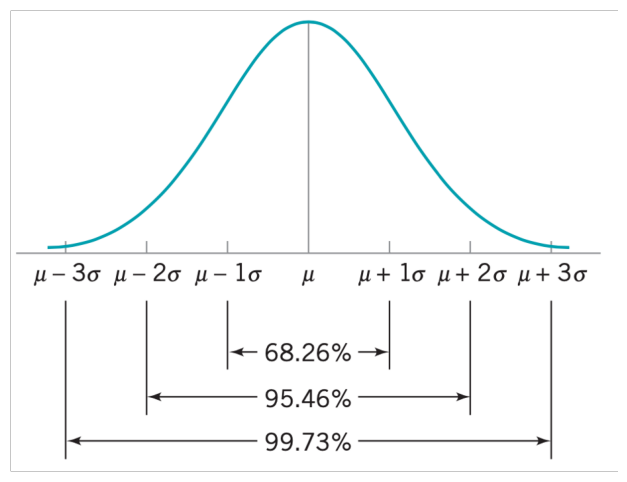

In [1]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

image_url = "https://github.com/tec03/Datasets/blob/main/images/normal.png?raw=true"


response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

plt.figure(figsize=(10, 6))  # Adjust width and height
plt.imshow(img)
plt.axis('off')
plt.show()




### 3 Constructing confidence intervals


#### 3.1 Two methods to create (50 * 1,000 = 50,000) Bootstrap Resamples:

#### 4. 1. 1 Original Workflow using pandas -  Generating 1000 Bootstrap Resamples (50 * 1,000 = 50,000)

#### 4. 1. 2 Enhanced Workflow (infer-like) -  Generating 1000 Bootstrap Resamples (50 * 1,000 = 50,000)

#### 4. 1. 3 Visualizing the Bootstrap Distribution

#### 4.3 Percentile method with infer

#### 4.4 Standard error method with infer

- In the case of the bootstrap distribution, the standard deviation has a special name: the standard error.

- Approximately *95% of the values of the bootstrap distribution* will lie within *± 1.96 standard errors (SE) of the sample mean ( $\bar{x}$ )*.



$$
\bar{x} \pm 1.96 \times SE = \left( \bar{x} - 1.96 \times SE, \, \bar{x} + 1.96 \times SE \right)
$$

Where:

  *  $\bar{x}$ is the *sample mean* of the bootstrap distribution.
  
  * $SE$ is the *standard error of the bootstrap distribution*, (standard deviation of the bootstrap sample means).

  * $1.96$ is the critical value for a *95% confidence level* from the standard normal distribution.



### 8.5 Interpreting confidence intervals

- The effectiveness of a confidence interval is judged by whether or not it contains the true value of the population parameter.
  - Did our net capture the fish?.
    - That can't be answered since we don't know the exact value of the population mean.
    - Can be answered using the bowl_data.

- What proportion of the bowl’s 2400 balls are red?

In [2]:
import pandas as pd
import numpy as np
bowl_data = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_n.csv'
bowl = pd.read_csv(bowl_data)
bowl

,ball_ID,color
0,1,white
1,2,white
2,3,white
3,4,red
4,5,white
...,...,...
2395,2396,white
2396,2397,red
2397,2398,white
2398,2399,white


In [3]:
bowl.columns

Index(['ball_ID', 'color'], dtype='object')

In [4]:
bowl_red = bowl[bowl['color'] == 'red']
bowl_red
pop_red_prop = len(bowl_red)/len(bowl)
print(f"Red balls proporsion   \t\t: {pop_red_prop}")
print(f"The population proportion is\t: {pop_red_prop}")

Red balls proporsion   		: 0.375
The population proportion is	: 0.375


This means - 37.5% of the bowl’s balls are red. The true population proporsion.

In [5]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_sample_1.csv'
bowl_sample_1 = pd.read_csv(path)
bowl_sample_1

,color
0,white
1,white
2,red
3,red
4,white
5,white
6,red
7,white
8,white
9,white


#### Case1 :- Using Spear

  - Let's use a sample, bowl_sample_1, to estimate the population proporsion.

Take same of a person and see what is the proporsion.

In [6]:
bowl_sample_1_red = bowl_sample_1[bowl_sample_1['color'] == 'red']
bowl_sample_1_red
sample_prop = len(bowl_sample_1_red)/len(bowl_sample_1)
print(f"Red balls proporsion in Sample 1 \t\t: {sample_prop}")
print(f"The population proportion of the Sample 1 is \t: {pop_red_prop}")

Red balls proporsion in Sample 1 		: 0.42
The population proportion of the Sample 1 is 	: 0.375



Context Recap:

* We calculated the **true population proportion** of red balls from the full bowl:

  $$
  \text{Population proportion} = 0.375 (pop\_red\_prop)
  $$
* Then we got **one sample** (bowl\_sample\_1) and found:

  $$
  \text{Sample proportion} = 0.42 (sample\_prop)
  $$

“Is it true that with one throw of a spear (i.e., one sample) we might hit the true value (i.e., the true population proportion)?”

> Conclusion:

> The sample proportion (0.42) ($sample\_prop$)  *differs* from the population proportion (0.375) ($pop\_red\_prop$), even though it was drawn from the same bowl.


Interpretation:

* This difference illustrates **sampling variability**
  
  - the idea that a **sample statistic** (like the proportion of red balls) can vary from the **true population parameter**, simply due to **random chance**.


*  Analogy (Fishing Analogy Reference):

  - Throwing a spear: you only get one estimate — might be close or far from the true value.
  - Casting a net: you get a range that is more likely to include the true value. This is CI.

In short, **even a well-drawn sample may not perfectly reflect the population** — and that’s expected.


Next Steps:

If you repeat this sampling process many times (e.g., using bootstrapping or simulation), you could build a **sampling distribution** and:

* Estimate **standard error**
* Construct **confidence intervals**
* See how often the sample proportion gets close to the true value


#### Case 2. 1 :- Using Net
  
  Net is Confidence Interval - CI


**2.1.1. Percentile-method-based**

  - 95% confidence interval

In [7]:
bowl_sample_1_list = bowl_sample_1['color'].tolist()
bowl_sample_1_list

['white',
 'white',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'red',
 'red',
 'red',
 'white',
 'red',
 'white',
 'red',
 'white',
 'red',
 'white',
 'red',
 'red',
 'red',
 'white']

Now, take 1,000  samples (replicas) of size 50.


The following fun. will - Imitate the style of the infer R package, which uses tidy verbs to express:
    
  - specifying a variable of interest,
  - generating resamples (bootstrap),
  - calculating statistics,
  - visualizing or comparing to a null distribution.

In [8]:
# we are using - np.random.choice fun. so, input should be a 1D array, list, or Series
sample_size = 50
bd = pd.DataFrame({
    'replicate': np.repeat(np.arange(1, 1001), sample_size),
    'color': np.random.choice(bowl_sample_1_list,
                              size=sample_size * 1000,
                              replace=True
                              )
})
bd.head()

,replicate,color
0,1,red
1,1,white
2,1,white
3,1,white
4,1,red


- Use `np.random.choice()` if you're only working with a single column or list.

- Use `df.sample()` if you want full data row context.
  - for example, if later you want to access other features like `ball_ID`, `weight`, etc.

In [9]:
reds = bd['color'] == 'red'
bd_red = bd[reds]
bd_red.tail()

,replicate,color
49989,1000,red
49990,1000,red
49994,1000,red
49995,1000,red
49996,1000,red


In [10]:
# to calculate how many reds in each of the replicas.
bdr_pvt = pd.pivot_table(bd_red,
                         values='color',
                         index='replicate',
                         aggfunc='count'
                         )
bdr_pvt.tail()

,color
replicate,
996,16
997,21
998,26
999,18
1000,24


In [11]:
# OR
# Calculating How many REDs (Mean reds) for each resample
bd_count = (
    bd_red.groupby('replicate')['color'].count().reset_index(name='count')
)
bd_count

,replicate,count
0,1,18
1,2,24
2,3,18
3,4,21
4,5,26
...,...,...
995,996,16
996,997,21
997,998,26
998,999,18


In [12]:
bd_count['Prop'] = bd_count['count'] / sample_size
bd_count

,replicate,count,Prop
0,1,18,0.36
1,2,24,0.48
2,3,18,0.36
3,4,21,0.42
4,5,26,0.52
...,...,...,...
995,996,16,0.32
996,997,21,0.42
997,998,26,0.52
998,999,18,0.36


Now, lets calculate the 95% Confidence Interval using the Percentile Method.

But remmember:  We take the middle 95% and discard the lowest 2.5% and the highest 2.5%. The remaining interval gives me a 95% confidence interval.



* we have to specify the *2.5th and 97.5th percentiles* of a distribution.
* this corresponds to a *95% confidence interval* in the *percentile method*.
* A *95% confidence interval* leaves *5% total error*, split equally across both tails:

  * *2.5% on the left*
  * *2.5% on the right*

So:

* *2.5th percentile* → lower bound of the CI
* *97.5th percentile* → upper bound of the CI




In [13]:
percentiles = [2.5, 97.5] # lower and upper percentile indices  #95% CI - 2.5 cut both sides.
percentile_ci = np.percentile(bd_count['Prop'], percentiles)

print(percentile_ci)

l_ci = percentile_ci[0]  # lower bound of 95% CI
u_ci = percentile_ci[1]  # upper bound of 95% CI

[0.28 0.56]


In [14]:
print(f"Percentile Method 95% Confidence Interval: Lower CI: {l_ci:.2f}, Upper CI: {u_ci:.2f}")

Percentile Method 95% Confidence Interval: Lower CI: 0.28, Upper CI: 0.56


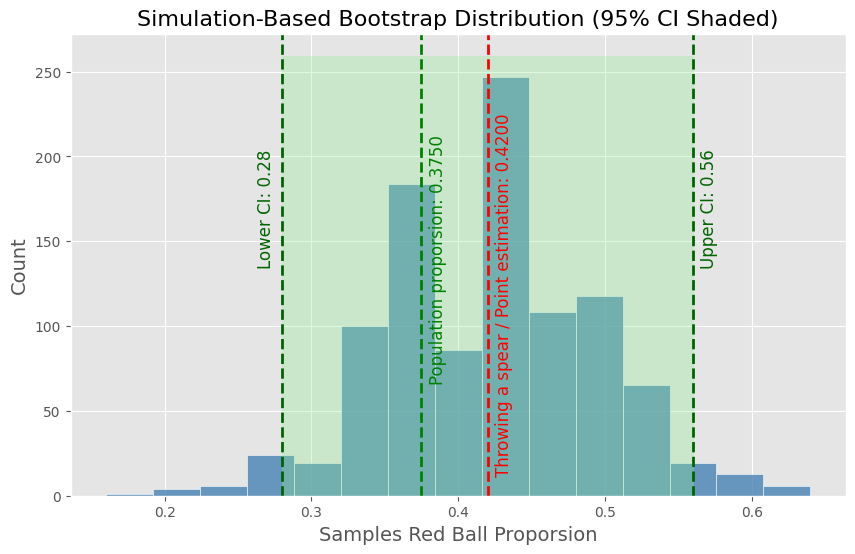

In [15]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
x_offset = 0.005

ax.hist(bd_count['Prop'],
        bins=15,
        edgecolor='white',
        color='steelblue',
        alpha=0.8
        )


ax.axvline(l_ci,
           color='darkgreen',
           linestyle='--',
           linewidth=2
           )
ax.axvline(u_ci,
           color='darkgreen',
           linestyle='--',
           linewidth=2
           )

ax.fill_betweenx(
    y=[0, ax.get_ylim()[1]],
    x1=l_ci,
    x2=u_ci,
    color='lightgreen',
    alpha=0.3
)

# Adding text labels for the CI values
ax.text(l_ci-x_offset,
        ax.get_ylim()[1] * 0.5,
        f"Lower CI: {l_ci:.2f}",
        fontsize=12,
        color='darkgreen',
        ha='right',
        rotation = 90
        )
ax.text(u_ci + x_offset,
        ax.get_ylim()[1] * 0.5,
        f"Upper CI: {u_ci :.2f}",
        fontsize=12,
        color='darkgreen',
        ha='left',
        rotation = 90
        )


ax.axvline(pop_red_prop,
           color='green',
           linestyle='--',
           linewidth=2
           )
ax.text(pop_red_prop+x_offset,
        ax.get_ylim()[1] * 0.25,
        f"Population proporsion: {pop_red_prop:.4f}",
        fontsize=12,
        color='green',
        ha='left',
        rotation = 90
        )


ax.axvline(sample_prop,
           color='red',
           linestyle='--',
           linewidth=2
           )
ax.text(sample_prop + x_offset,
        ax.get_ylim()[1] * 0.05,
        f"Throwing a spear / Point estimation: {sample_prop:.4f}",
        fontsize=12,
        color='red',
        ha='left',
        rotation = 90
        )

ax.set_title('Simulation-Based Bootstrap Distribution (95% CI Shaded)', fontsize=16)
ax.set_xlabel('Samples Red Ball Proporsion', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

Conclusion:

- Did Sample ('bowl_sample_1.csv') of the person's net capture the fish?
- Did their 95% confidence interval for  $p$ based on their sample contain the true value of  $p$ of 0.375?
  - Yes!
  - 0.375 $\in$  (Lower CI, Upper CI).

#### Case 2 - 2: What would happen if we had taken a completely *random* sample?

 - if we had a different sample of 50 balls
 - and constructed a different confidence interval
  - would it necessarily contain  $p= 0.375$ as well?

Lets see.

For, we generate a RANDOM sample of size 50. We use 'bowl_sample_1.csv' to generate a sample of 50 draws.

In [16]:
#We generate a total RANDOM sample of size 50.  Last time, we had a sample 1 dataset.
sample_size = 50

sample2 = pd.DataFrame({
    'replicate': np.repeat(np.arange(1, 51), 1),
    'color': np.random.choice(bowl_sample_1_list,
                              size=50 * 1,
                              replace=True
                              )
})
sample2.head()

,replicate,color
0,1,white
1,2,white
2,3,white
3,4,white
4,5,white


In [17]:
sample2.shape

(50, 2)

We have a totally random sample, sample2,  of 50 balls.
  - From this we will create a bootstrap and a CI.

In [18]:
sample2 = sample2['color']
#bootstraping
bd = pd.DataFrame({
    'replicate': np.repeat(np.arange(1, 1001), 50),
    'color': np.random.choice(sample2,
                              size=50 * 1000,
                              replace=True)
})
bd.tail(5)

,replicate,color
49995,1000,white
49996,1000,red
49997,1000,white
49998,1000,white
49999,1000,red


In [19]:
reds = bd['color'] == 'red'
bd_reds = bd[reds]
bd_reds

,replicate,color
3,1,red
4,1,red
5,1,red
10,1,red
15,1,red
...,...,...
49988,1000,red
49989,1000,red
49993,1000,red
49996,1000,red


In [20]:
bd_reds_count = (
    bd_reds.groupby('replicate')['color'].count().reset_index(name='count')
)
bd_reds_count

,replicate,count
0,1,19
1,2,23
2,3,22
3,4,31
4,5,23
...,...,...
995,996,25
996,997,22
997,998,14
998,999,24


In [21]:
bd_reds_count['Prop'] = bd_reds_count['count'] / 50
bd_reds_count

,replicate,count,Prop
0,1,19,0.38
1,2,23,0.46
2,3,22,0.44
3,4,31,0.62
4,5,23,0.46
...,...,...,...
995,996,25,0.50
996,997,22,0.44
997,998,14,0.28
998,999,24,0.48


In [22]:
# 95% Confidence Interval — keep middle 95%, cut 2.5% from each tail
percentiles = [2.5, 97.5]
percentile_ciTWO = np.percentile(bd_reds_count['Prop'], percentiles)

l_ci = percentile_ciTWO[0]  # Lower bound of 95% CI
u_ci = percentile_ciTWO[1]  # Upper bound of 95% CI

In [23]:
print(f"Percentile Method 95% Confidence Interval: Lower CI: {l_ci:.2f}, Upper CI: {u_ci:.2f}")

Percentile Method 95% Confidence Interval: Lower CI: 0.32, Upper CI: 0.60


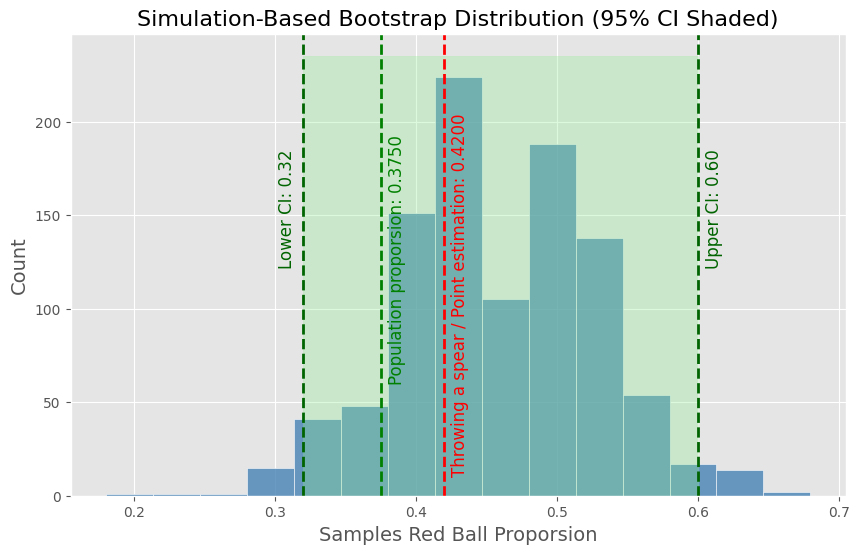

In [24]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
x_offset = 0.005

ax.hist(bd_reds_count['Prop'],  ## NEW df
        bins=15,
        edgecolor='white',
        color='steelblue',
        alpha=0.8
        )


ax.axvline(l_ci,
           color='darkgreen',
           linestyle='--',
           linewidth=2
           )
ax.axvline(u_ci,
           color='darkgreen',
           linestyle='--',
           linewidth=2
           )

ax.fill_betweenx(
    y=[0, ax.get_ylim()[1]],
    x1=l_ci,
    x2=u_ci,
    color='lightgreen',
    alpha=0.3
)

# Adding text labels for the CI values
ax.text(l_ci-x_offset,
        ax.get_ylim()[1] * 0.5,
        f"Lower CI: {l_ci:.2f}",
        fontsize=12,
        color='darkgreen',
        ha='right',
        rotation = 90
        )
ax.text(u_ci + x_offset,
        ax.get_ylim()[1] * 0.5,
        f"Upper CI: {u_ci :.2f}",
        fontsize=12,
        color='darkgreen',
        ha='left',
        rotation = 90
        )


ax.axvline(pop_red_prop,
           color='green',
           linestyle='--',
           linewidth=2
           )
ax.text(pop_red_prop+x_offset,
        ax.get_ylim()[1] * 0.25,
        f"Population proporsion: {pop_red_prop:.4f}",
        fontsize=12,
        color='green',
        ha='left',
        rotation = 90
        )


ax.axvline(sample_prop,
           color='red',
           linestyle='--',
           linewidth=2
           )
ax.text(sample_prop + x_offset,
        ax.get_ylim()[1] * 0.05,
        f"Throwing a spear / Point estimation: {sample_prop:.4f}",
        fontsize=12,
        color='red',
        ha='left',
        rotation = 90
        )

ax.set_title('Simulation-Based Bootstrap Distribution (95% CI Shaded)', fontsize=16)
ax.set_xlabel('Samples Red Ball Proporsion', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

✨ ✨ Thus, if we had a different sample of 50 balls and constructed a different confidence interval, would it necessarily contain  𝑝=0.42  as well!!!

In [25]:
print(f"The first CI (percentile method) is\t : {percentile_ci}")
print(f"The second CI (percentile method) is\t : {percentile_ciTWO}")


print("\nConclusion:")
if percentile_ci[0] <= pop_red_prop <= percentile_ci[1]:
    print("CI1 captures the true population proportion")
else:
    print("CI1 does NOT capture the true population proportion.")

if percentile_ciTWO[0] <= pop_red_prop <= percentile_ciTWO[1]:
    print("CI2 captures the true population proportion.")
else:
    print("CI2 does NOT capture the true population proportion.")


The first CI (percentile method) is	 : [0.28 0.56]
The second CI (percentile method) is	 : [0.32 0.6 ]

Conclusion:
CI1 captures the true population proportion
CI2 captures the true population proportion.


#### 2. 3 Now repeat this process TEN more times:
  - we take 10 virtual samples from the bowl
  - construct 10 95% confidence intervals.

The **percentile method** and the **standard error method** are two common ways to construct confidence intervals (CIs) from bootstrap resampling.  

1. **Percentile Method**

  Working principle:
    * You generate many bootstrap resamples.
    * Calculate the statistic (e.g., mean, proportion) for each resample.
    * Then, you **take the percentiles** from the bootstrap distribution:

  * For a 95% CI: use the 2.5th and 97.5th percentiles.


  
Advantages:
    
  * Simple and intuitive.
  * No need to calculate standard errors.

Limitations:

  * Assumes the bootstrap distribution is well-behaved and symmetric enough.
  * May perform poorly if the distribution is skewed or biased.



2. **Standard Error Method** (Normal Approximation method)

  Working principle:
    * You calculate the **standard error** of the bootstrap distribution.
    * Then you create a confidence interval using:

Advantages:

  * Useful when the bootstrap distribution is approximately normal.
  * Connects well with classical inference logic.

Limitations:

  * Assumes the **distribution is symmetric and bell-shaped**
      * which is not always true
  * Can give misleading results for skewed or small samples.





When to use:

* **Use percentile method** when your bootstrap distribution is **not symmetric** or is skewed.
* **Use standard error method** when your distribution is **roughly normal** and symmetric.

##### 2. 3. 1 Percentile method

In [26]:
def create_ci(sample):
    """
    Create a 95% confidence interval for the proportion of red in the sample
    using the bootstrap PERCENTILE method.

    Parameters:
    - sample: list or array-like of observed values (e.g., ['red', 'white', ...])

    Returns:
    - A NumPy array with the lower and upper bounds of the 95% confidence interval
    """

    # Step 1: Generate bootstrap resamples
    bd = pd.DataFrame({
        'replicate': np.repeat(np.arange(1, 1001), len(sample)),
        'color': np.random.choice(sample,
                                  size=len(sample) * 1000,
                                  replace=True)
    })

    # Step 2: Filter for 'red' outcomes
    reds = bd['color'] == 'red'
    bd_red = bd[reds]

    # Step 3: Count red outcomes per replicate
    bd_red_counts = (
        bd_red.groupby('replicate')['color']
        .count()
        .reset_index(name='count')
    )

    # Step 4: Calculate the proportion of red in each bootstrap sample
    bd_red_counts['Prop'] = bd_red_counts['count'] / len(sample)

    # Step 5: Compute the 95% confidence interval using percentiles
    percentiles = [2.5, 97.5]
    percentile_ci = np.percentile(bd_red_counts['Prop'], percentiles)

    return percentile_ci  # [lower_bound, upper_bound]


In [27]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_sample_1.csv'
bowl_sample_1 = pd.read_csv(path)
bowl_sample_1.tail()

,color
45,white
46,red
47,red
48,red
49,white


In [28]:
reds = bowl_sample_1['color'] == 'red'
bowl_sample_1_red = bowl_sample_1[reds]
bowl_sample_1_red.tail()

,color
42,red
44,red
46,red
47,red
48,red


In [29]:
sample1_red_prop = len(bowl_sample_1_red)/len(bowl_sample_1)

print(f"The population proportion of the Sample 1 is : {sample1_red_prop}")

The population proportion of the Sample 1 is : 0.42


In [30]:
bowl_sample_1_list = bowl_sample_1['color'].tolist()
bowl_sample_1_list

['white',
 'white',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'red',
 'red',
 'red',
 'white',
 'red',
 'white',
 'red',
 'white',
 'red',
 'white',
 'red',
 'red',
 'red',
 'white']

In [31]:
num_samples = 10 # Number of virtual samples

true_prop = sample1_red_prop  # True proportion of red balls

# Store confidence intervals and capture information
cis = []
captures = []

# Create num_samples virtual samples and confidence intervals
for _ in range(num_samples):
    virtual_sample = np.random.choice(bowl_sample_1_list,
                                      size=50,
                                      replace=True
                                      )

    virtual_sample_df = pd.DataFrame({'color': virtual_sample})

    virtual_sample = virtual_sample_df['color'].tolist()

    ci = create_ci(virtual_sample)

    cis.append(ci)
    captures.append(true_prop >= ci[0] and true_prop <= ci[1])

In [32]:
virtual_sample # only LAST one is saved in this variable

['red',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'red',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'red']

In [33]:
virtual_sample_df # only LAST one is saved in this variable

,color
0,red
1,white
2,white
3,white
4,red
5,white
6,white
7,red
8,red
9,white


In [34]:
ci # only LAST one is saved in this variable

array([0.28  , 0.5405])

In [35]:
cis # Each iteration is saved in this variable

[array([0.36, 0.64]),
 array([0.44, 0.72]),
 array([0.26, 0.52]),
 array([0.38, 0.66]),
 array([0.14, 0.4 ]),
 array([0.18, 0.42]),
 array([0.24, 0.52]),
 array([0.28, 0.56]),
 array([0.34, 0.62]),
 array([0.28  , 0.5405])]

In [36]:
captures # True if true_prop intersects with this ci

[np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_]

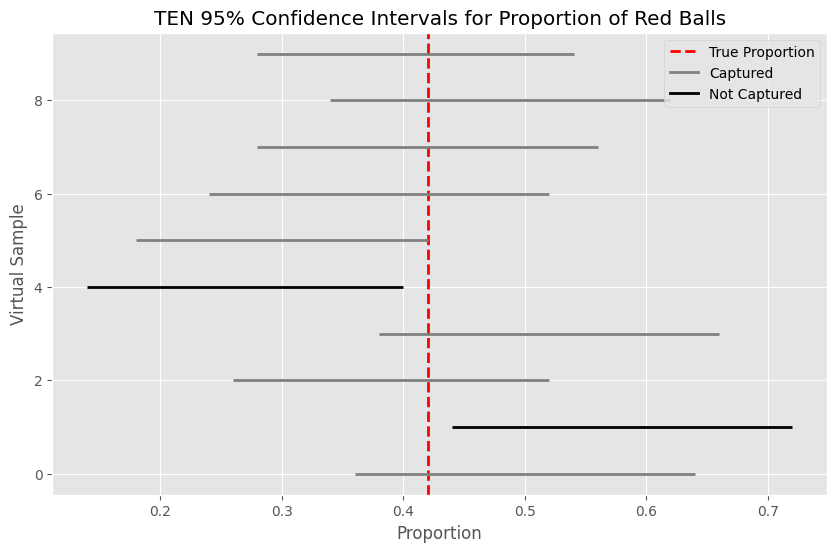

In [37]:
from matplotlib.lines import Line2D

# Plotting the results
plt.figure(figsize=(10, 6))
plt.axvline(true_prop,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'True Proportion: {true_prop:.2f}'
            )

for i, ci in enumerate(cis):
    color = 'grey' if captures[i] else 'black'
    plt.hlines(i,
               ci[0],
               ci[1],
               color=color,
               linewidth=2
               )


# Custom legend for captured and not captured
legend_elements = [
    Line2D([0], [0], color='red', linestyle='--', lw=2, label='True Proportion'),
    Line2D([0], [0], color='grey', lw=2, label='Captured'),
    Line2D([0], [0], color='black', lw=2, label='Not Captured'),
]

plt.xlabel("Proportion")
plt.ylabel("Virtual Sample")
plt.title("TEN 95% Confidence Intervals for Proportion of Red Balls")
plt.legend(handles=legend_elements)
plt.show()


In [38]:
win_rate = (sum(captures)/len(cis))*100
print(f'Win rate:\t', win_rate)
print(f'{win_rate:.2f}%\t of the time, our nets caught the fish \n {100- win_rate:.2f}%\t of the times, our nets didn’t!')

Win rate:	 80.0
80.00%	 of the time, our nets caught the fish 
 20.00%	 of the times, our nets didn’t!


  ☆ In other words, *win_rate* of the time,  our nets caught the fish, whereas *1-win_rate* of our nets didn’t!.
    - We used the Percentile method to calculate teh CIs

##### 2. 3. 2  Repeate the same using - 'Standard error method'

In [39]:
from scipy.stats import norm

def get_critical_value(confidence_level):
    """
    Compute the critical z-value for a two-tailed CI
    at a specified confidence level (e.g., 0.95 for 95%).

    Parameters:
    - confidence_level: (e.g., 0.95)

    Returns:
    - z*: the critical value from the standard normal distribution
    """
    # CI = middle region; (1 - confidence_level)/2 in each tail

    z = norm.ppf(1 - (1 - confidence_level) / 2) # ppf stands for Percent Point Function.

    return z



def create_ci_se_empirical(sample, confidence_level=0.95):
    """
    It is based on bootstrap resampling to estimate SE empirically.
    Construct a CI for the proportion of 'red' using the
    SE method and bootstrap resampling.

    Parameters:
    - sample: list or array-like of categorical outcomes (e.g., ['red', 'white', ...])
    - confidence_level: (e.g., 0.95 for a 95% CI)

    Returns:
    - (ci_lower, ci_upper): tuple of floats representing the CI bounds
    """

    # Step 1: Generate 1000 bootstrap resamples from the sample
    bd = pd.DataFrame({
        'replicate': np.repeat(np.arange(1, 1001), len(sample)),
        'color': np.random.choice(sample,
                                  size=len(sample) * 1000,
                                  replace=True
                                  )
    })

    # Step 2: Filter to keep only 'red' outcomes
    reds = bd['color'] == 'red'
    bd_red = bd[reds]

    # Step 3: Count number of red observations in each bootstrap replicate
    bd_red_counts = (
        bd_red.groupby('replicate')['color']
        .count()
        .reset_index(name='count')
    )

    # Step 4: Calculate proportion of red in each replicate
    bd_red_counts['Prop'] = bd_red_counts['count'] / len(sample)

    # Step 5: Estimate standard error from the bootstrap proportions
    sample_mean = bd_red_counts['Prop'].mean()
    standard_error = bd_red_counts['Prop'].std() # SD → that’s empirical SE.

    # Step 6: Compute critical z-value and build confidence interval

    z = get_critical_value(confidence_level)

    ci_lower = sample_mean - z * standard_error
    ci_upper = sample_mean + z * standard_error

    return ci_lower, ci_upper


Two different ways to implement the **Standard Error (SE) method**


1. Bootstrap-based Standard Error Method

```python
def create_ci_se(sample, confidence_level):
    # Bootstrap resampling 1000 times
    ...
    bd_red_counts['Prop'] = bd_red_counts['count'] / len(sample) # true ppn propn.
    
    sample_mean = bd_red_counts['Prop'].mean()
    standard_error = bd_red_counts['Prop'].std()
    
    critical_value = get_critical_value(confidence_level)
    ...
```

* Simulates 1000 *bootstrap samples*.
* Calculates the *proportion of red* in each.
* Estimates *standard error empirically* (empirical = based on experience, data, or experiments) from the distribution of bootstrap proportions.
* Constructs the CI using:

  $$
  \text{CI} = \bar{p} \pm z^* \times \text{SE}_{\text{bootstrap}}
  $$

Characteristics:

* Non-parametric.
* Does *not assume* the underlying sampling distribution is normal.
* Captures *true sampling variability*, especially useful for small or skewed samples.
* Slower (computationally) but *more robust*.



2.  Formula-based (Analytical) Standard Error Method

```python
def create_ci_se(sample, confidence_level):
    sample_prop = np.sum(sample == 'red') / len(sample)
    se = np.sqrt((sample_prop * (1 - sample_prop)) / len(sample))
    ...
```

* Computes sample proportion once.
* Uses the *standard formula* for standard error of a proportion:

  $$
  SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
  $$
* Constructs CI assuming a *normal approximation*.

Characteristics:

* *Parametric* and *faster*.
* Relies on the *Central Limit Theorem* — works well if:

  * Sample size is large (typically $n \geq 30$)
  * Proportion isn’t too close to 0 or 1
* Less accurate for *small or skewed samples*


Conclusion:

* Use *bootstrap* when:

  * The sample is small
  * The proportion is near 0 or 1
  * You want *empirical accuracy*

* Use *formula* when:

  * Sample is large ($n > 30$)
  * You're doing quick analysis or need performance
  * You’re comfortable assuming approximate normality

In [40]:
#Compute SE using the formula 𝑆𝐸=\sqrt(𝑝̂(1−𝑝̂)/n)

def create_ci_se_formula(sample, confidence_level=0.95):
    """
    Construct a CI for the proportion of 'red' in the sample
    using the analytical (FORMULA-based) SE method.

    This method assumes a binomial model and uses the normal approximation
    to estimate uncertainty.

    Parameters:
    - sample: list or array-like of categorical outcomes (e.g., ['red', 'white', ...])
    - confidence_level: (e.g., 0.95 for 95% CI)

    Returns:
    - (lower_ci, upper_ci): tuple of floats representing the CI bounds
    """

    # Step 1: Compute sample proportion of 'red'
    sample_prop = np.sum(np.array(sample) == 'red') / len(sample)

    # Step 2: Compute SE using the  formula
    se = np.sqrt((sample_prop * (1 - sample_prop)) / len(sample))

    # Step 3: Get z-value for the desired confidence level (e.g., 1.96 for 95%)
    z_value = norm.ppf(1 - (1 - confidence_level) / 2)

    # Step 4: Construct confidence interval
    lower_ci = sample_prop - z_value * se
    upper_ci = sample_prop + z_value * se

    return lower_ci, upper_ci


In [41]:
num_samples = 10  # Number of virtual samples
true_prop = sample1_red_prop  # True proportion of red balls
true_prop

0.42

In [42]:
cis = []
captures = []

for _ in range(num_samples):
    virtual_sample = np.random.choice(bowl_sample_1_list,
                                      size=50,
                                      replace=True
                                      )

    virtual_sample_df = pd.DataFrame({'color': virtual_sample})

    virtual_sample = virtual_sample_df['color'].tolist()

    #ci = create_ci_se_formula(virtual_sample, true_prop)
    ci = create_ci_se_empirical(virtual_sample, true_prop)

    cis.append(ci)

    captures.append(true_prop >= ci[0] and true_prop <= ci[1])

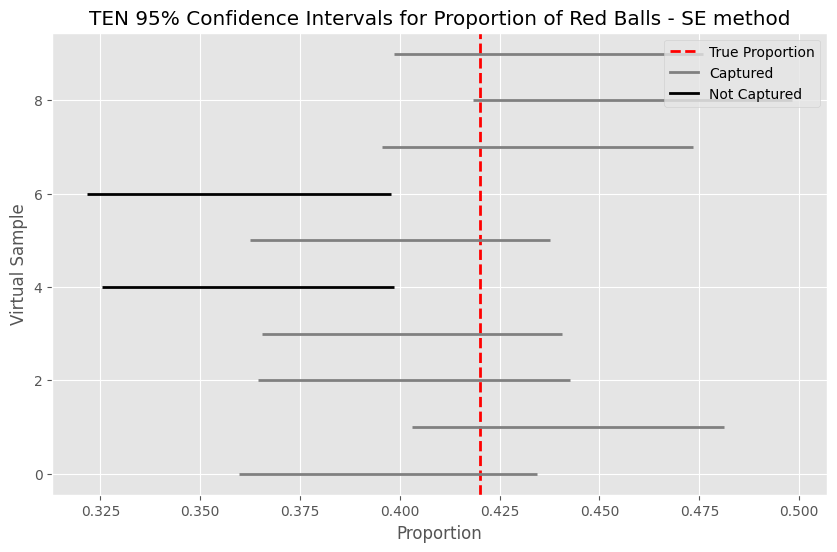

In [43]:
plt.figure(figsize=(10, 6))
plt.axvline(true_prop,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'True Proportion: {true_prop:.2f}'
            )

for i, ci in enumerate(cis):
    color = 'grey' if captures[i] else 'black'
    plt.hlines(i,
               ci[0],
               ci[1],
               color=color,
               linewidth=2
               )

legend_elements = [
    Line2D([0], [0], color='red', linestyle='--', lw=2, label='True Proportion'),
    Line2D([0], [0], color='grey', lw=2, label='Captured'),
    Line2D([0], [0], color='black', lw=2, label='Not Captured'),
]
plt.xlabel("Proportion")
plt.ylabel("Virtual Sample")
plt.title("TEN 95% Confidence Intervals for Proportion of Red Balls - SE method")
plt.legend(handles=legend_elements)
plt.show()

In [44]:
win_rate = (sum(captures)/len(cis))*100
print(f'Win rate:\t', win_rate)
print(f'{win_rate:.2f}%\t of the time, our nets caught the fish \n{100- win_rate:.2f}%\t of the times, our nets didn’t!')

Win rate:	 80.0
80.00%	 of the time, our nets caught the fish 
20.00%	 of the times, our nets didn’t!


☆ In other words, *win_rate* of the time,  our nets caught the fish, whereas *1-win_rate* of our nets didn’t!.
  - We used the Stnadard Error method to calculate teh CIs

#### 4 Critical values - Can calculate from statistical table, or here in python.

For any normally distributed variable:

- 68% of the values fall within ± 1 standard deviation of the mean.
    - (x ± 1 x SE)
- 95% of the values fall within ± 1.96 standard deviations of the mean.
    - (x ± 1.96 x SE)
- 99.7% of the values fall within ± 3 standard deviations of the mean.
    - (x ± 3 x SE)

PPF:

Given a *probability*, `ppf` tells you the *value of the variable* at that percentile.

Mathematically:

$$
\text{If } P(X \leq x) = p \quad \text{then } \text{ppf}(p) = x
$$


- `ppf` stands for *Percent Point Function*
- it is the *inverse* of the *CDF* (Cumulative Distribution Function)
-  norm.ppf(0.975)  ≈ 1.96 : What z-value corresponds to the 97.5th percentile of the standard normal distribution?

Inverse: norm.cdf(1.96)  ≈ 0.975


So:  norm.ppf(norm.cdf(1.96)) → 1.96




*`norm.ppf(p)`* returns the *z-score* such that:

$$
P(Z \leq z) = p
$$

Used to get *cutoff values* (like 1.96) for confidence intervals.

In [45]:
from scipy.stats import norm

# Function to calculate the critical value (Z) for any confidence level
def get_critical_value(confidence_level):
    alpha = 1 - confidence_level
    z_value = norm.ppf(1 - alpha / 2)
    return z_value


ci_80 = get_critical_value(0.80)
ci_90 = get_critical_value(0.90)
ci_95 = get_critical_value(0.95)
ci_99 = get_critical_value(0.99)

print(f"80% CI Critical Value (Z): ±{ci_80:.3f}")
print(f"90% CI Critical Value (Z): ±{ci_90:.3f}")
print(f"95% CI Critical Value (Z): ±{ci_95:.3f}")
print(f"99% CI Critical Value (Z): ±{ci_99:.3f}")

80% CI Critical Value (Z): ±1.282
90% CI Critical Value (Z): ±1.645
95% CI Critical Value (Z): ±1.960
99% CI Critical Value (Z): ±2.576


Why the *80% Confidence Interval (CI)* Has a Lower Win Rate:

* The *win_rate* here means the probability that the confidence interval captures the true population parameter.
* An *80% CI* is *narrower* than a 95% or 99% CI because it covers only the *middle 80%* of the distribution.
* This means it is *more precise* (narrower range) but has a *higher chance of missing* the true parameter.

* A *95% CI* is calculated using:

  $$
  \bar{x} \pm 1.96 \times SE
  $$

  This means it captures the middle *95%* of the bootstrap distribution, leaving *2.5% in each tail*.

* An *80% CI* is calculated using:

  $$
  \bar{x} \pm 1.282 \times SE
  $$

  This means it captures only the middle *80%* of the distribution, leaving *10% in each tail*.


In a simulation, an 80% CI will capture the true value in only 80% of trials on average, while a 95% CI will capture it in 95% of trials.


Precise and shorthand interpretation:
  - If we repeated our sampling procedure a large number of times, we expect about 95% of the resulting confidence intervals to capture the value of the population parameter.
  - We can expect our confidence intervals to include the true population parameter about 95% of the time.
  - We are 95% “confident” that a 95% confidence interval captures the value of the population parameter.


  >Conclusion on pennies : We are 95% “confident” that the true mean year of pennies in circulation in 2019 is somewhere between 1991.24 and 1999.42.

### 5. Effect of Confidence Level on CI Width

In [46]:
import pandas as pd
import numpy as np

# Load bowl data
bowl_data = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_n.csv'
bowl = pd.read_csv(bowl_data)
bowl_red = bowl[bowl['color'] == 'red']
true_prop = len(bowl_red) / len(bowl)

# Load sample data
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_sample_1.csv'
bowl_sample_1 = pd.read_csv(path)
bowl_sample_1_list = bowl_sample_1['color'].tolist()


confidence_levels = [0.80, 0.90, 0.95, 0.99]
num_samples = 30

for cl in confidence_levels:
    cis = []
    for _ in range(num_samples):
        virtual_sample = np.random.choice(bowl_sample_1_list,
                                          size=50,
                                          replace=True)
        ci = create_ci_se_empirical(virtual_sample, cl)
        cis.append(ci)

    widths = [ci[1]-ci[0] for ci in cis]

    print(f"Confidence Level : {cl*100}% \t Average Width : {np.mean(widths).round(2)}")

Confidence Level : 80.0% 	 Average Width : 0.18
Confidence Level : 90.0% 	 Average Width : 0.23
Confidence Level : 95.0% 	 Average Width : 0.27
Confidence Level : 99.0% 	 Average Width : 0.36


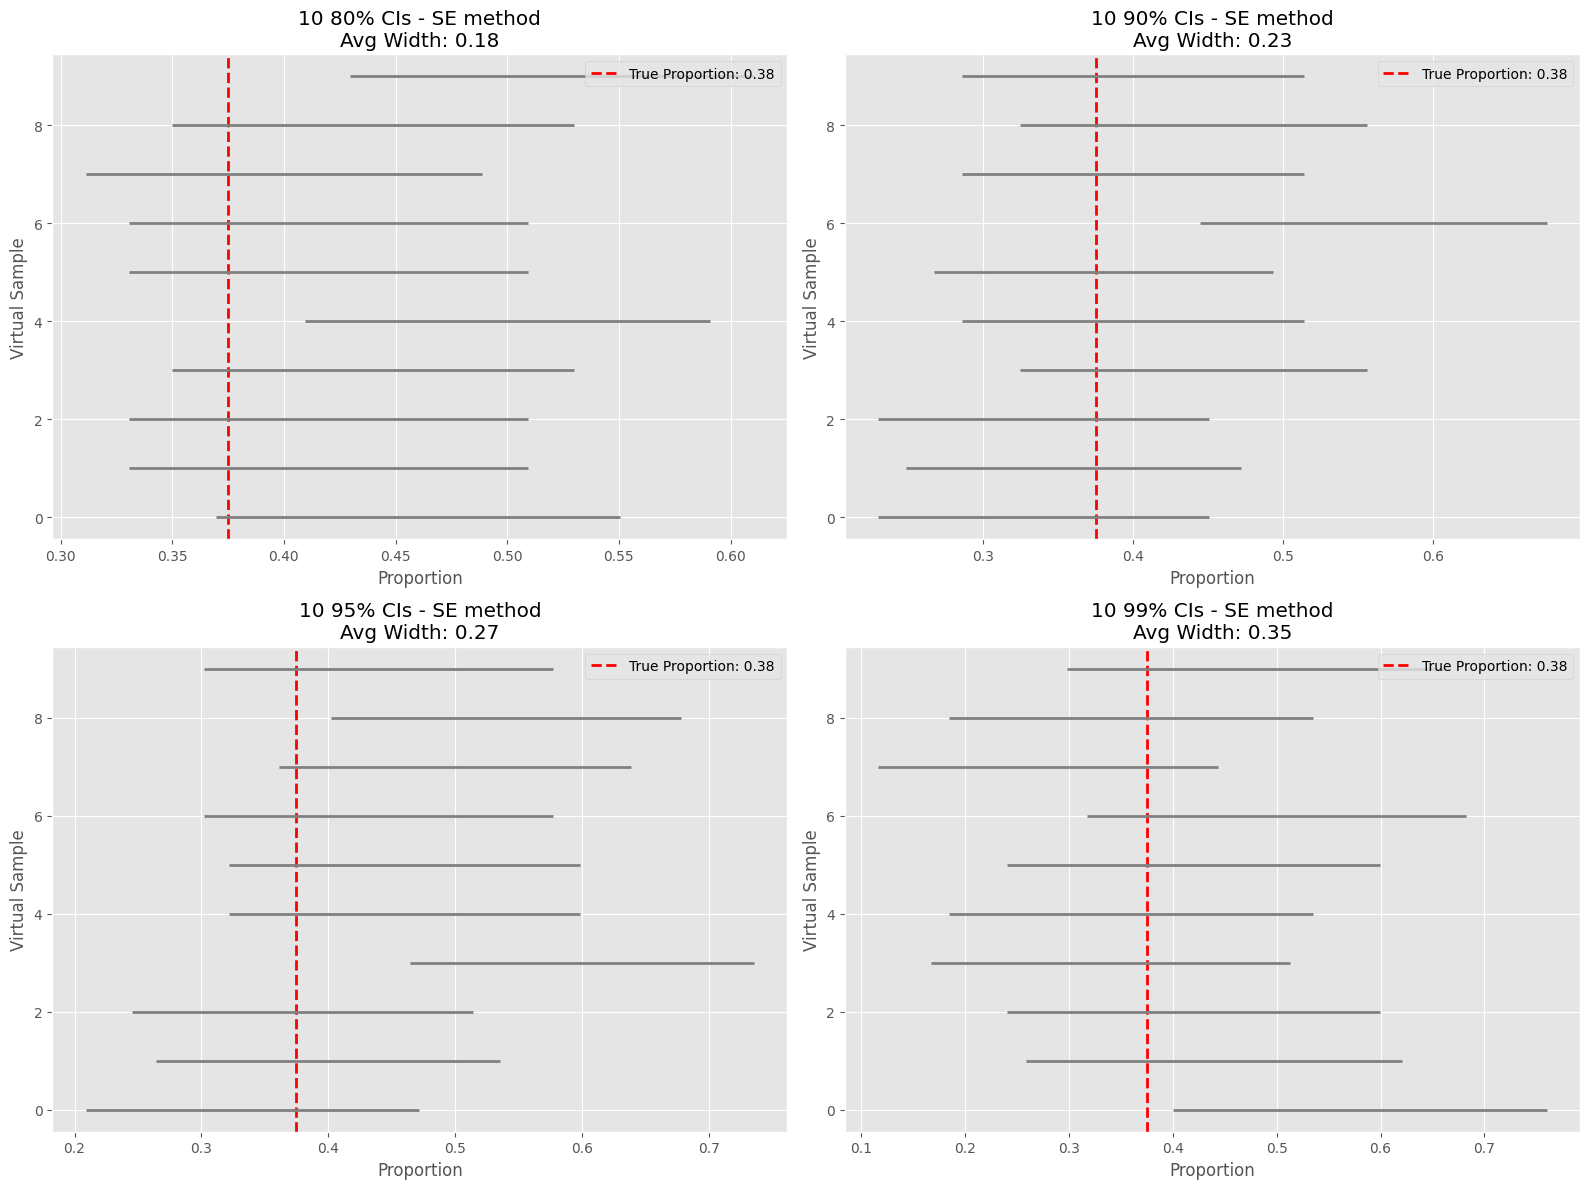

In [47]:
confidence_levels = [0.80, 0.90, 0.95, 0.99]
num_samples = 10
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.ravel()  # Flattening the 2x2 grid

# Looping through each confidence level
for idx, confidence_level in enumerate(confidence_levels):
    cis = []
    widths = []

    for _ in range(num_samples):
        virtual_sample = np.random.choice(bowl_sample_1_list, size=50, replace=True)
        virtual_sample = np.array(virtual_sample)
        ci = create_ci_se_formula(virtual_sample, confidence_level)
        cis.append(ci)
        widths.append(ci[1] - ci[0])

    # Plotting each subplot
    ax = axs[idx]
    ax.axvline(true_prop, color='red', linestyle='--', linewidth=2, label=f'True Proportion: {true_prop:.2f}')


    for i, ci in enumerate(cis):
        ax.hlines(i, ci[0], ci[1], color='grey', linewidth=2)

    ax.set_xlabel("Proportion")
    ax.set_ylabel("Virtual Sample")
    ax.set_title(f"{num_samples} {int(confidence_level * 100)}% CIs - SE method\nAvg Width: {np.mean(widths):.2f}")
    ax.legend()

plt.tight_layout()
plt.show()


Conclusion:

  Higher confidence LEVELS tend to produce WIDER confidence intervals.

### 6 : Effect of Sample Size on CI Width

In [48]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

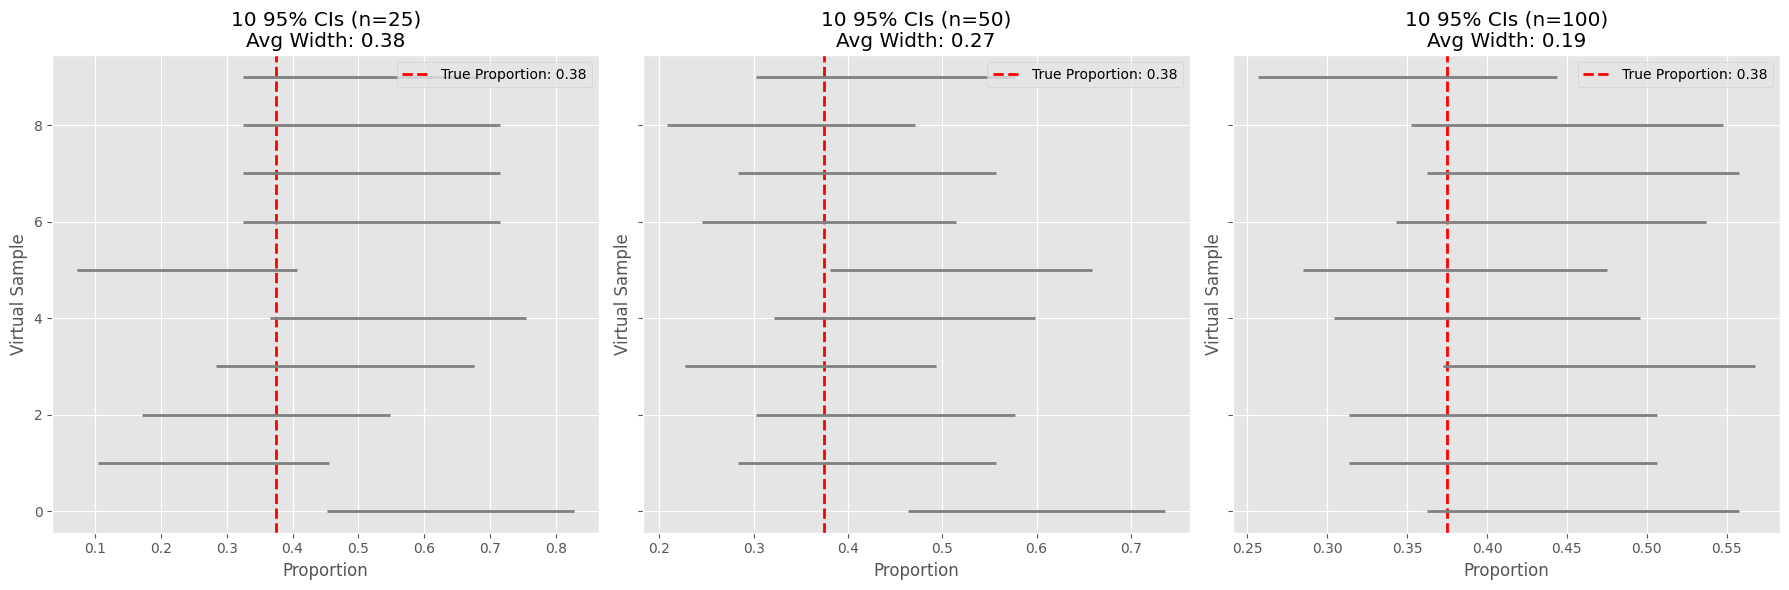

In [50]:
sample_sizes = [25, 50, 100]
confidence_level = 0.95
num_samples_per_size = 10

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots
for i, sample_size in enumerate(sample_sizes):
  cis = []
  widths = []
  for _ in range(num_samples_per_size):
    virtual_sample = np.random.choice(bowl_sample_1_list, size=sample_size, replace=True)
    virtual_sample = np.array(virtual_sample)
    ci = create_ci_se_formula(virtual_sample, confidence_level)
    cis.append(ci)
    widths.append(ci[1]-ci[0])

  ax = axes[i]  # Select the current subplot
  ax.axvline(true_prop, color='red', linestyle='--', linewidth=2, label=f'True Proportion: {true_prop:.2f}')

  for j, ci in enumerate(cis):
    ax.hlines(j, ci[0], ci[1], color='grey', linewidth=2)

  ax.set_xlabel("Proportion")
  ax.set_ylabel("Virtual Sample")
  ax.set_title(f"{num_samples_per_size} {int(confidence_level * 100)}% CIs (n={sample_size})\nAvg Width: {np.mean(widths):.2f}")
  ax.legend()

plt.tight_layout()
plt.show()


Larger sample sizes tend to produce narrower confidence intervals.

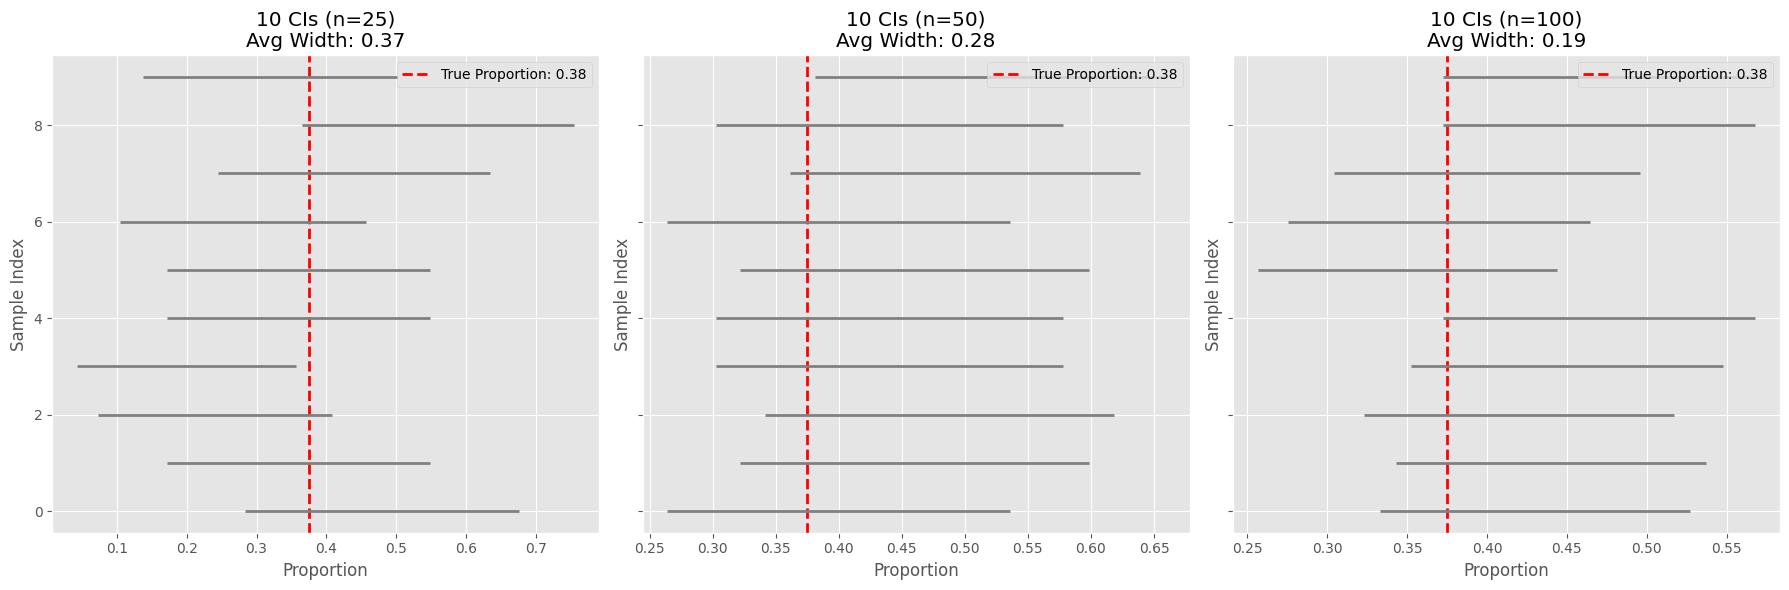

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load full population and sample
bowl_url = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_n.csv'
bowl_sample_url = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_sample_1.csv'

bowl = pd.read_csv(bowl_url)
bowl_sample_1 = pd.read_csv(bowl_sample_url)
bowl_sample_1_list = bowl_sample_1['color'].tolist()

# True population proportion of red balls
true_prop = (bowl['color'] == 'red').mean()

# Function to create CI using standard error formula
from scipy.stats import norm

def create_ci_se(sample, confidence_level=0.95):
    sample = np.array(sample)
    p_hat = np.mean(sample == 'red')
    se = np.sqrt(p_hat * (1 - p_hat) / len(sample))
    z = norm.ppf(1 - (1 - confidence_level) / 2)
    return p_hat - z * se, p_hat + z * se

# Parameters
sample_sizes = [25, 50, 100]
confidence_level = 0.95
num_samples_per_size = 10

# Create subplots for each sample size
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, size in enumerate(sample_sizes):
    ax = axes[i]
    cis = []
    widths = []

    # Create CIs for repeated virtual samples
    for _ in range(num_samples_per_size):
        virtual_sample = np.random.choice(bowl_sample_1_list, size=size, replace=True)
        ci = create_ci_se_formula(virtual_sample, confidence_level)
        cis.append(ci)
        widths.append(ci[1] - ci[0])

    # Plot true proportion line
    ax.axvline(true_prop, color='red', linestyle='--', linewidth=2, label=f'True Proportion: {true_prop:.2f}')

    # Plot each confidence interval as a horizontal line
    for j, ci in enumerate(cis):
        ax.hlines(j, ci[0], ci[1], color='grey', linewidth=2)

    # Customize subplot
    ax.set_title(f"{num_samples_per_size} CIs (n={size})\nAvg Width: {np.mean(widths):.2f}")
    ax.set_xlabel("Proportion")
    ax.set_ylabel("Sample Index")
    ax.legend()

plt.tight_layout()
plt.show()


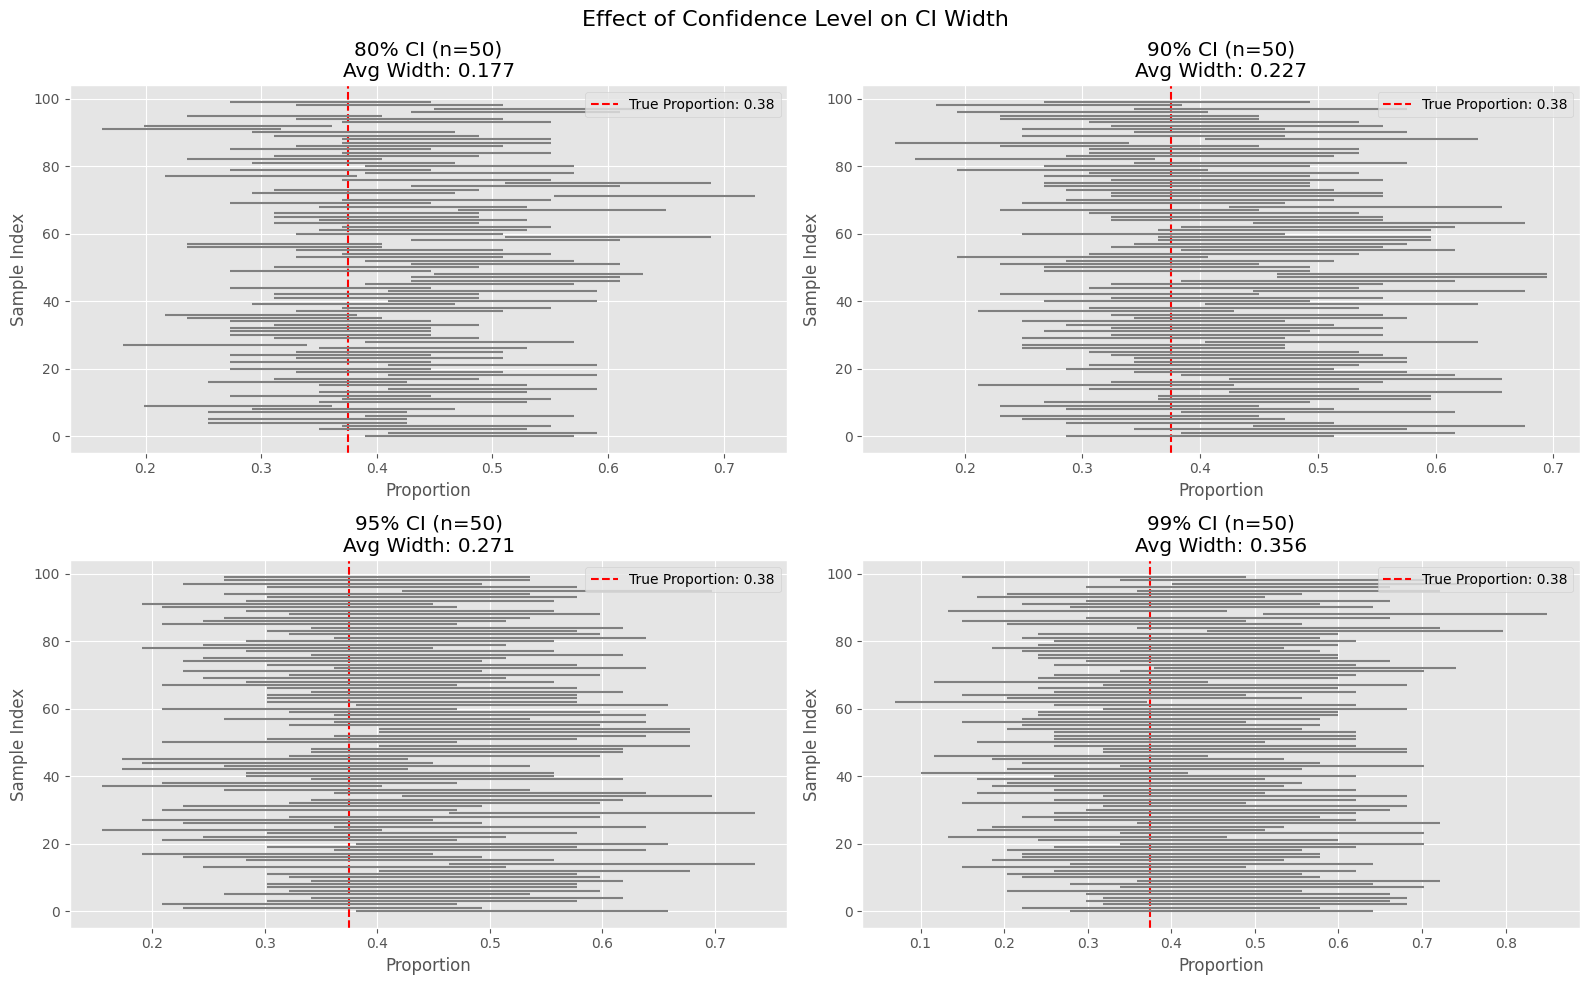

In [52]:
bowl_url = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_n.csv'
sample_url = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_sample_1.csv'

bowl = pd.read_csv(bowl_url)
bowl_sample = pd.read_csv(sample_url)['color'].tolist()
true_prop = (bowl['color'] == 'red').mean()



# Set 1: Varying confidence level
confidence_levels = [0.80, 0.90, 0.95, 0.99]
num_samples = 100
sample_size = 50

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

for idx, cl in enumerate(confidence_levels):
    cis = []
    widths = []
    for _ in range(num_samples):
        s = np.random.choice(bowl_sample,
                             size=sample_size,
                             replace=True)
        ci = create_ci_se(s, confidence_level=cl)
        cis.append(ci)
        widths.append(ci[1] - ci[0])

    ax = axs[idx]
    ax.axvline(true_prop,
               color='red',
               linestyle='--',
               label=f"True Proportion: {true_prop:.2f}"
               )
    for j, ci in enumerate(cis):
        ax.hlines(j,
                  ci[0],
                  ci[1],
                  color='grey')

    ax.set_title(f"{int(cl*100)}% CI (n={sample_size})\nAvg Width: {np.mean(widths):.3f}")
    ax.set_xlabel("Proportion")
    ax.set_ylabel("Sample Index")
    ax.legend()

plt.suptitle("Effect of Confidence Level on CI Width", fontsize=16)
plt.tight_layout()
plt.show()


Higher confidence ⇒ Wider CIs

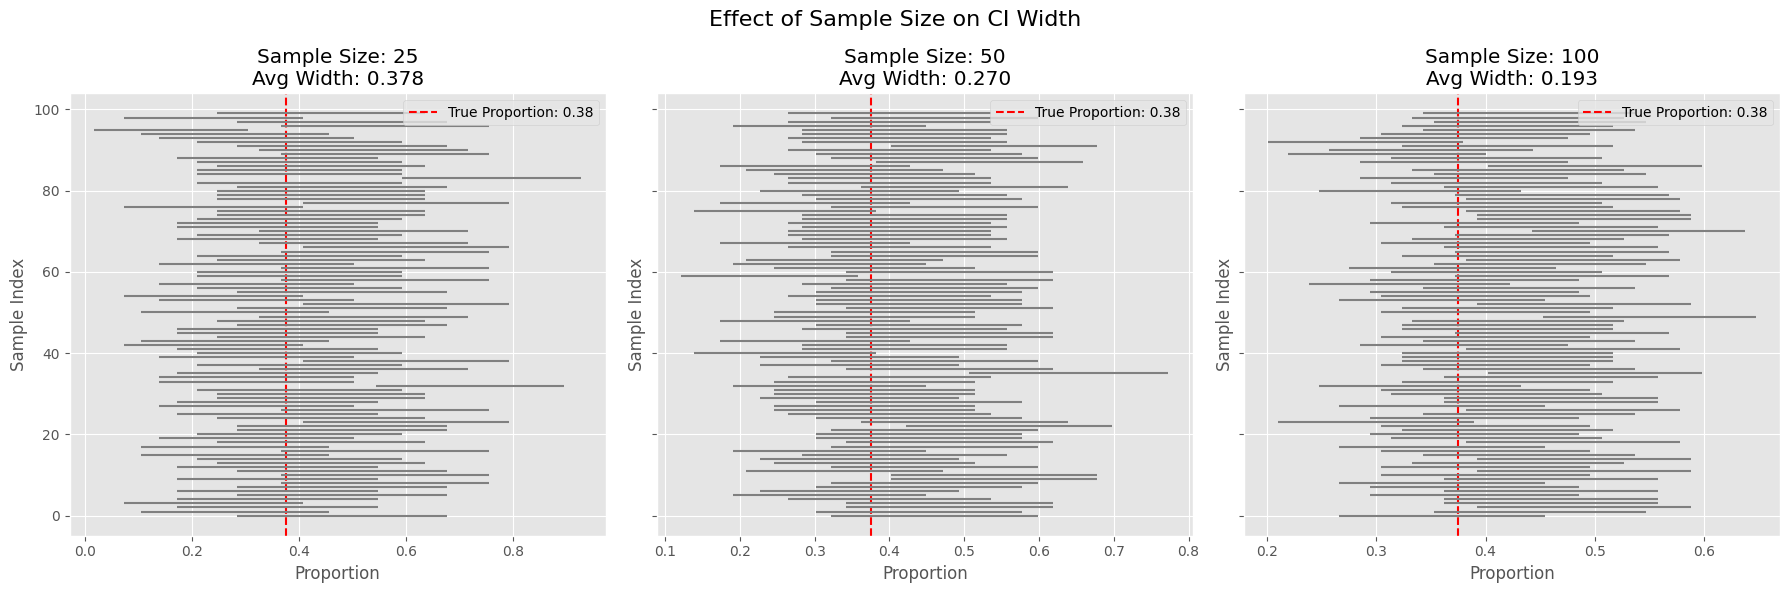

In [53]:
# Set 2: Varying sample size
sample_sizes = [25, 50, 100]
confidence_level = 0.95
num_samples = 100

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, size in enumerate(sample_sizes):
    cis = []
    widths = []
    for _ in range(num_samples):
        s = np.random.choice(bowl_sample, size=size, replace=True)
        ci = create_ci_se(s, confidence_level=confidence_level)
        cis.append(ci)
        widths.append(ci[1] - ci[0])

    ax = axs[idx]
    ax.axvline(true_prop, color='red', linestyle='--', label=f"True Proportion: {true_prop:.2f}")
    for j, ci in enumerate(cis):
        ax.hlines(j, ci[0], ci[1], color='grey')

    ax.set_title(f"Sample Size: {size}\nAvg Width: {np.mean(widths):.3f}")
    ax.set_xlabel("Proportion")
    ax.set_ylabel("Sample Index")
    ax.legend()

plt.suptitle("Effect of Sample Size on CI Width", fontsize=16)
plt.tight_layout()
plt.show()


Larger sample ⇒ Narrower CIs (more precise)

✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆ ✨✯ ★ ☆